In [1]:
import TMQGP as tm
from numpy import *
import QuarkTM
import numpy as np

In [2]:
import matplotlib
matplotlib.style.use('publication23')

# Import spectral functions and T-matrices

In [3]:
folder = '../run/output/QG_4channel/'

In [4]:
trange = arange(0.15, 0.65, 0.05)

In [5]:
T = 0.15
qrange = np.loadtxt(folder + 'qrange_T=%.3f.dat'%T)
erange = np.loadtxt(folder + 'erange_T=%.3f.dat'%T)

In [40]:
pts = []

ch_names = ['qa1', 'qa8', 'qq3', 'qq6']

TMs = []
Sigmas = []
Sigma_tots = []

for T in trange:
    qrange = np.loadtxt(folder + 'qrange_T=%.3f.dat'%T)
    erange = np.loadtxt(folder + 'erange_T=%.3f.dat'%T)
    Gtab = np.loadtxt(folder + 'Q_G_T=%.3f.dat'%T, dtype=complex)
    
#     Gtab = 1/(1/Gtab - 2e-2j + 2e-3j)
    
    pt = QuarkTM.Particle(0.6, qrange, erange, 
                         Gtab=Gtab)
    pts += [pt]
    
    Sigma_tot = np.loadtxt(folder + 'Q_S_T=%.3f.dat'%T, dtype=complex)
    
    Sigma_tots += [Sigma_tot]
    
    tms = dict()
    sms = dict()
    for ch in ch_names:
        _tm = np.loadtxt(folder + f'Q_TM_{ch}_T=%.3f.dat'%T,
                       dtype=complex)
        tms[ch] = _tm
        
#         sigma = np.loadtxt(folder + f'Q_ReS_{ch}_T=%.3f.dat'%T)
        sigma = (1j*np.loadtxt(folder + f'Q_ImS_{ch}_T=%.3f.dat'%T)
                + np.loadtxt(folder + f'Q_ReS_{ch}_T=%.3f.dat'%T))
        
        sms[ch] = sigma
        
        
    TMs += [tms]
    Sigmas += [sms]

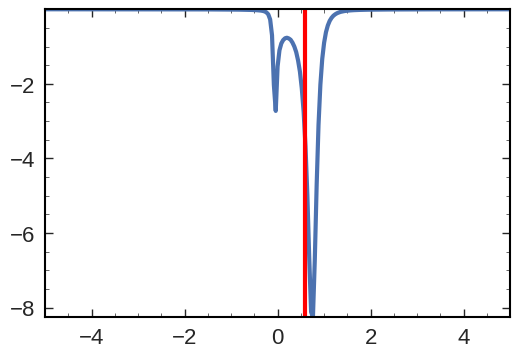

In [41]:
plt.plot(erange, imag(pts[-1].Gtab[:, 0]))
plt.axvline(0.6, c='red')

In [42]:
G0 = 1/(1 / pts[0].Gtab + Sigma_tots[0])

/usr/lib/python3.11/site-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


(-2.0, 2.0)

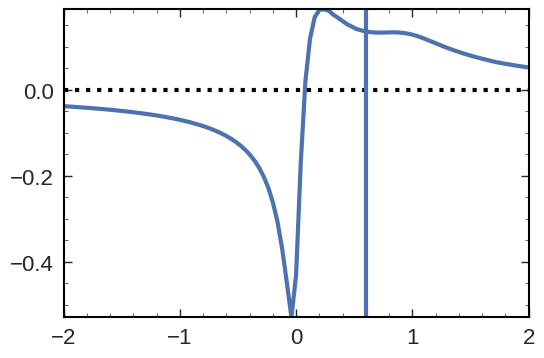

In [43]:
plt.plot(erange, Sigma_tots[-1][:, 0])
plt.axhline(0, ls=':', c='black')
plt.axvline(0.6)
plt.xlim(-2, 2)

(-2.0, 2.0)

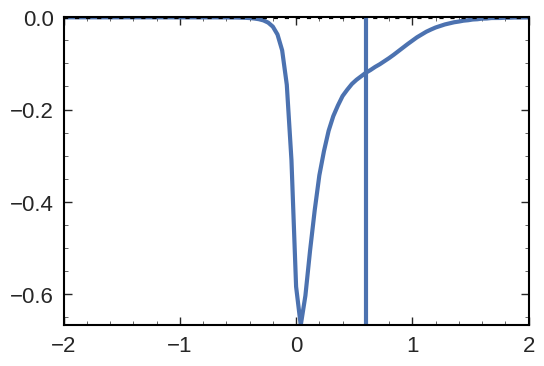

In [44]:
plt.plot(erange, imag(Sigma_tots[-1][:, 0]))
plt.axhline(0, ls=':', c='black')
plt.axvline(0.6)
plt.xlim(-2, 2)

[]

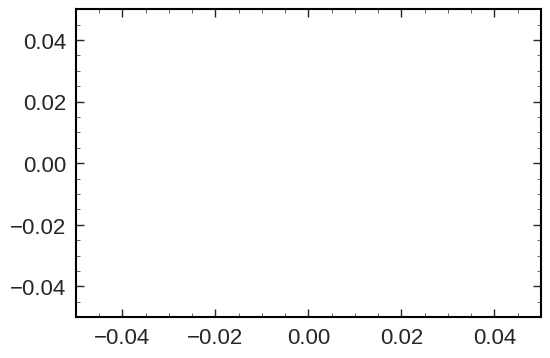

In [45]:
plt.plot()

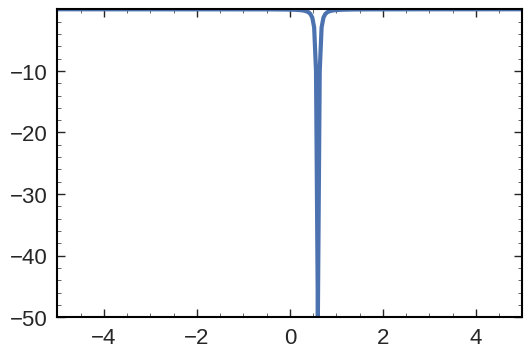

In [46]:
plt.plot(erange, imag(G0[:, 0]))

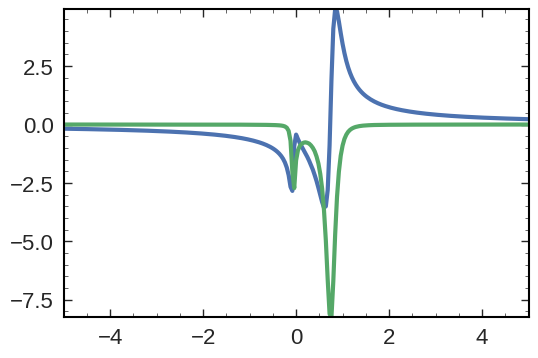

In [47]:
plt.plot(erange, real(pts[-1].Gtab[:, 0]))
plt.plot(erange, imag(pts[-1].Gtab[:, 0]))

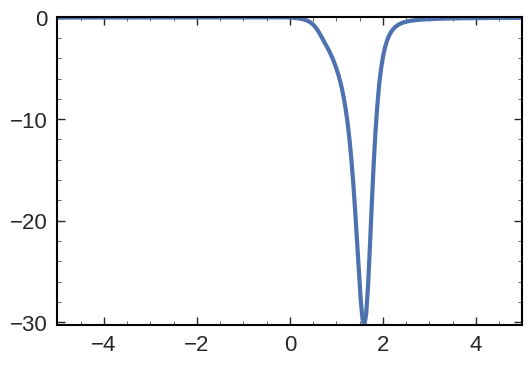

In [48]:
plt.plot(erange, imag(TMs[-1]['qa1'][:, 0]))

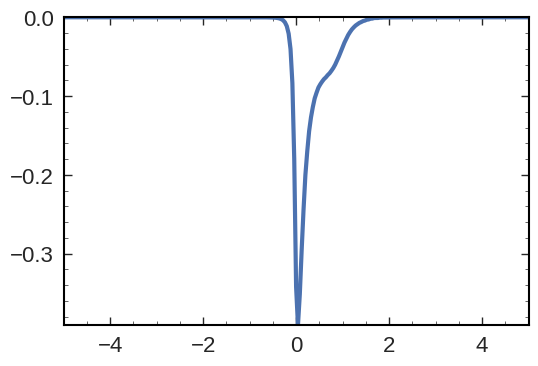

In [49]:
plt.plot(erange, imag(Sigmas[-1]['qa1'][:, 0]))

#  Pressure

## Calculate the quasiparticle pressure

In [50]:
ps_Q = array([tm.OmQ_F(T, pt.iImG, pt.iReG) 
            for T, pt in zip(trange, pts)])

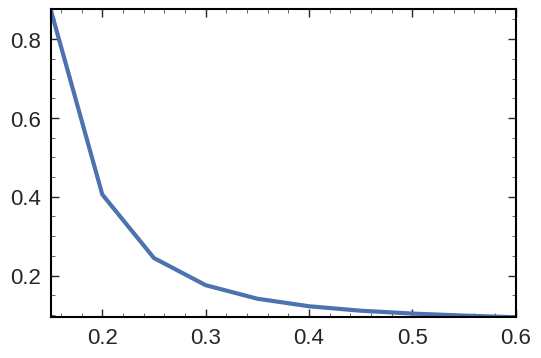

In [51]:
plt.plot(trange, ps_Q/trange**4)

## Calculate the self-energy pressure

In [52]:
import numpy as np

In [53]:
ps_S = []

for T, pt, sms, sig_tot in zip(trange, pts, Sigmas, Sigma_tots):
#     sigma = np.sum(list(sms.values()), axis=0) - 1e-3j
    sigma = sig_tot - 2e-2j
#     plt.plot(erange, real(sigma[:, 0]))
    iReS = tm.Interpolator2D(qrange, erange, np.ascontiguousarray(real(sigma)))
    iImS = tm.Interpolator2D(qrange, erange, np.ascontiguousarray(imag(sigma)))
    
    iImG = tm.Interpolator2D(qrange, erange, np.ascontiguousarray(imag(pt.Gtab)))
    iReG = tm.Interpolator2D(qrange, erange, np.ascontiguousarray(real(pt.Gtab)))
    
#     break
    ps_S += [tm.OmS_F(T, iImG, iReG, iImS, iReS)]

In [54]:
ps_S = array(ps_S)
ps_Q = array(ps_Q)

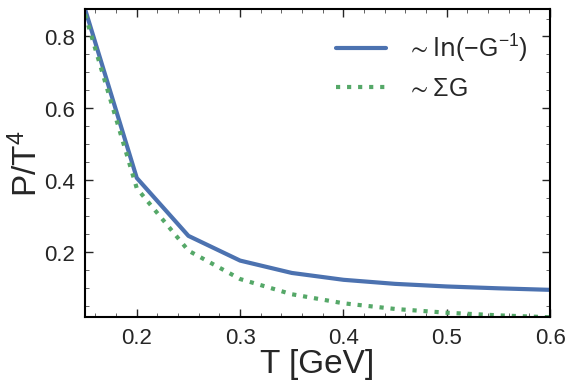

In [55]:
plt.plot(trange, ps_Q/trange**4, label='$\sim\ln(-G^{-1})$')
plt.plot(trange, ps_S/trange**4, ls=':', label='$\sim\Sigma G$')
plt.xlabel('T [GeV]')
plt.ylabel('$P/T^4$')
plt.legend()

Plot the integrand

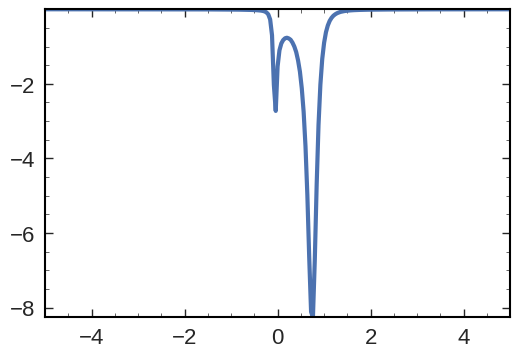

In [56]:
plt.plot(erange, [iImG(0, e) for e in erange])

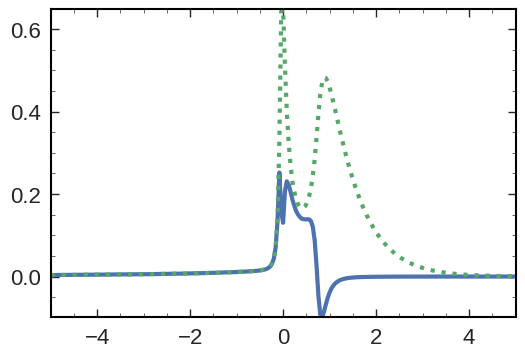

In [57]:
plt.plot(erange, [tm.n_f(e, T) * (iReG(0, e)*iImS(0, e)) for e in erange])
# plt.plot(erange, [tm.n_f(e, T) * (iImG(0, e)*iReS(0, e)) for e in erange])

plt.plot(erange, [tm.n_f(e, T) * tm.delta(e, 0, iImG, iReG) for e in erange], ls=':')


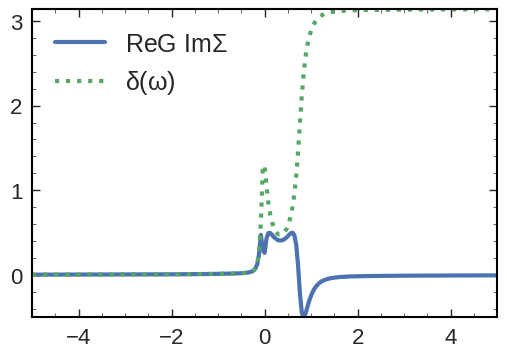

In [58]:
plt.plot(erange, [(iReG(0, e)*iImS(0, e)) for e in erange], label='ReG Im$\Sigma$')
plt.plot(erange, [tm.delta(e, 0, iImG, iReG) for e in erange], ls=':', label='$\delta(\omega)$')

plt.legend()


In [59]:
from scipy.integrate import quad

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


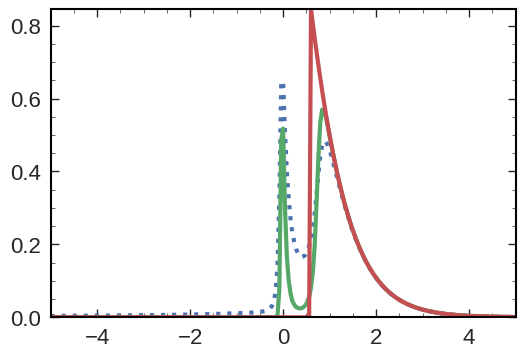

In [74]:
plt.plot(erange, [tm.n_f(e, T) * tm.delta(e, 0, iImG, iReG) for e in erange], ls=':')

plt.plot(erange, [tm.n_f(e, T) * tm.delta(e, 0, iImG, iReG) for e in erange] 
                    - array([tm.n_f(e, T) * (iReG(0, e)*iImS(0, e)) for e in erange]))

plt.plot(erange, [pi*tm.n_f(e, T) if e > 0.6 else 0 for e in erange])

plt.legend()



Get the QP masses

In [61]:
from scipy.integrate import quad

Pfree = array([quad(lambda z: z*z*T*log(1 + exp(-sqrt(0.6**2 + z**2)/T)) / 2/pi**2, 0, 5)[0] for T in trange])

In [62]:
ps_S

array([0.00043586, 0.00060357, 0.0007943 , 0.00100675, 0.00122948,
       0.00145235, 0.00167605, 0.00190004, 0.00211333, 0.00229746])

In [63]:
ps_Q

array([0.00044335, 0.00064946, 0.00095507, 0.00142274, 0.00211962,
       0.00312695, 0.00454411, 0.0064715 , 0.00900509, 0.0122006 ])

Text(0.4, 0.6, '$m_f$ = 0.6 GeV')

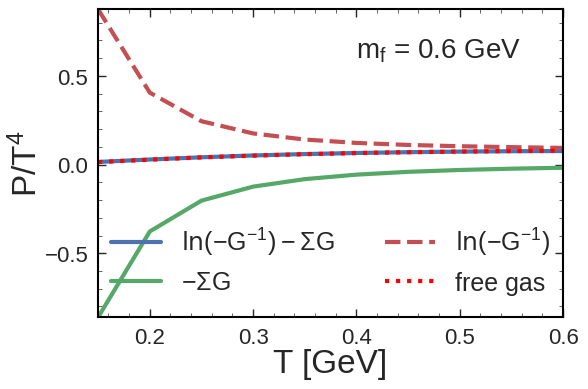

In [65]:
plt.plot(trange, (ps_Q - ps_S)/trange**4, label='$\ln(-G^{-1}) - \Sigma G$')
plt.plot(trange, (-ps_S)/trange**4, label='$-\Sigma G$')
plt.plot(trange, (ps_Q)/trange**4, ls='--', label='$\ln(-G^{-1})$')
plt.plot(trange, Pfree/trange**4, ls=':', c='red', label='free gas')

# plt.ylim(0, 0.2)
plt.xlim(0.15, 0.6)

plt.legend(ncol=2, loc='lower center')

plt.ylabel('$P/T^4$')
plt.xlabel('T [GeV]')

plt.text(0.4, 0.6, r'$m_f$ = 0.6 GeV', fontsize=20)

# plt.savefig('PQ_lowres_attr_negrange.pdf', bbox_inches='tight')

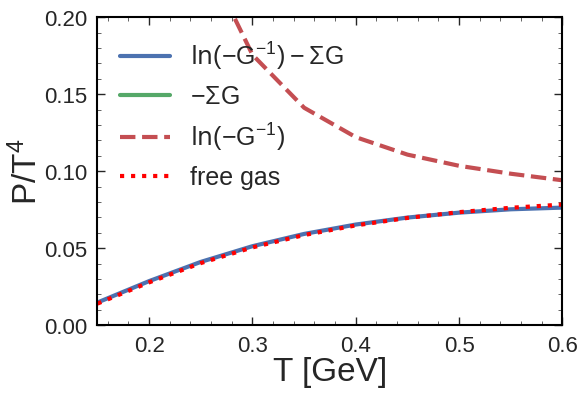

In [66]:
plt.plot(trange, (ps_Q - ps_S)/trange**4, label='$\ln(-G^{-1}) - \Sigma G$')
plt.plot(trange, (-ps_S)/trange**4, label='$-\Sigma G$')
plt.plot(trange, (ps_Q)/trange**4, ls='--', label='$\ln(-G^{-1})$')
plt.plot(trange, Pfree/trange**4, ls=':', c='red', label='free gas')

plt.ylim(0, 0.2)
plt.xlim(0.15, 0.6)

plt.legend(ncol=1, loc='upper left')

plt.ylabel('$P/T^4$')
plt.xlabel('T [GeV]')

# plt.text(0.4, 0.6, r'$m_f$ = 0.6 GeV', fontsize=20)

plt.savefig('PQ_lowres_attr.pdf', bbox_inches='tight')

(0.0, 2.0)

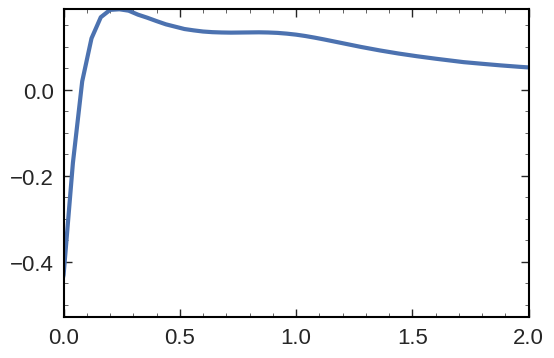

In [67]:
plt.plot(erange, real(Sigma_tots[-1][:, 0]))
plt.xlim(0, 2)

In [70]:
ps_S = array([tm.OmS_F(T, pt.iImG, pt.iReG) 
            for T, pt in zip(trange, pts)])

TypeError: OmS_F() missing 2 required positional arguments: 'iImS' and 'iReS'

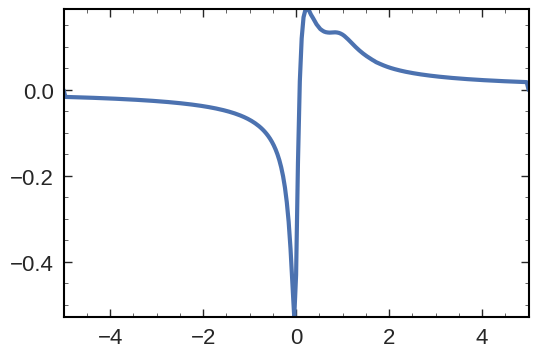

In [71]:
plt.plot(erange, real(sigma[:, 0]))

## $\Phi$-functional